<a href="https://colab.research.google.com/github/victorjms/face_recognition/blob/main/Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro
Tu segundo proyecto tendrá mucha más libertad que tu primer proyecto. Esto se debe a que queremos que tengas un proyecto en tu cartera que te interese o se relacione con la industria en la que te gustaría trabajar.

Tu tarea para esta semana es seleccionar el conjunto de datos con el que te gustaría trabajar para el Proyecto 2. Estos datos pueden ser de cualquier fuente y pueden ser sobre cualquier tema, solo asegúrate de que la licencia indique que puedes usarlos. Asegúrate de seleccionar un conjunto de datos con el que sea razonable trabajar en la cantidad de tiempo que nos queda. Piensa en las preguntas que podrías responder razonablemente con el conjunto de datos que selecciones. Debes seleccionar un conjunto de datos que tenga algún tipo de componente de aprendizaje automático (supervisado o no supervisado).

# Algunas preguntas a considerar:

## ¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?
Como se componen los datos capacesde predecir imágenes
## ¿Es esta una tarea supervisada o no supervisada?
supervisada
## Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?
clasificación
## ¿Qué tan limpios están tus datos?
bastante limpios
## ¿Qué problemas crees que pueden surgir?
si no está lo suficientemente entrenado puede omitir o confundir rostros

In [6]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
# importamos el conjunto de datos
from sklearn.datasets import fetch_lfw_people
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':14})
# colocamos el conjunto de datos en un avariable
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [7]:
# Obtener Imagenes
n_samples, h, w = faces.images.shape
npix = h*w

# Data en 2D
X = faces.data
n_features = X.shape[1]

# Labels of images
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print('Image size     = {0:d} x {1:d} = {2:d} pixels'.format(h,w,npix))
print('Number faces   = {0:d}'.format(n_samples))
print('Number classes = {0:d}'.format(n_classes))

Image size     = 62 x 47 = 2914 pixels
Number faces   = 1348
Number classes = 8


In [8]:
n_samples / n_classes

168.5

# Graficando rostros

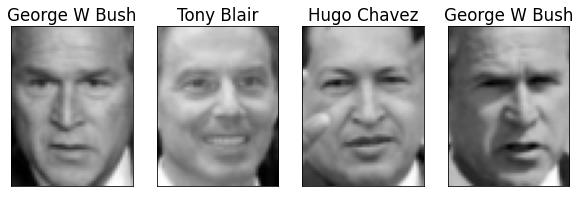

In [9]:
def plt_face(x):
    h = 62
    w = 47
    plt.imshow(x.reshape((h,w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
  
I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))
nplt = 4;
for i in range(nplt):
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(X[ind])
    plt.title(target_names[y[ind]])

Estimación de los componentes principales por medio de la desviación standar

In [10]:
npix = h*w
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]

In [11]:
U,S,Vtr = np.linalg.svd(Xs, full_matrices=False)

Text(0, 0.5, 'PoV')

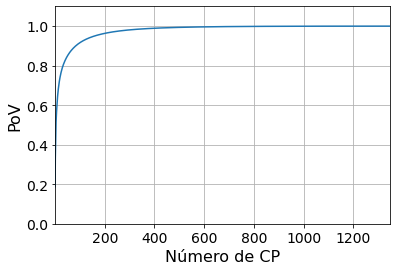

In [12]:
lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.grid()
plt.axis([1,n_samples,0, 1.1])
plt.xlabel('Número de CP', fontsize=16)
plt.ylabel('PoV', fontsize=16)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [18]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

#from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


print(__doc__)



Automatically created module for IPython interactive environment


In [19]:
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)


In [21]:
from sklearn.decomposition import RandomizedPCA
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

ImportError: ignored